# Intro to Inputting and Visualizing Data

In this section, we dicuss how to input and interpret basic ocean data.

As always, we first run `%pylab inline` to embed figures into the notebook. Additionally, we `import` the `scipy.io.netcdf` package to let us import data from another file.

In [1]:
%pylab inline
import scipy.io.netcdf

Populating the interactive namespace from numpy and matplotlib


## Inputing the Data

We use a function from the package to input data from a destined file to a variable, or handle, that will store the data.

In [2]:
data_handle = scipy.io.netcdf_file('example_data/WOA13_annual_SST_nc3_classic.nc')

To view what variables our data contains, we simply apply the `.variables` command to our handle.

In [3]:
data_handle.variables

OrderedDict([('lat', <scipy.io.netcdf.netcdf_variable at 0x10cfd3450>),
             ('lon', <scipy.io.netcdf.netcdf_variable at 0x10cfd34d0>),
             ('tos', <scipy.io.netcdf.netcdf_variable at 0x10cfd3510>)])

In [11]:
lat = data_handle.variables['lat']
lon = data_handle.variables['lon']

We find that our data set consists of three variables: `lat`, `lon` and `tos`. We can example certain metadata (characteristics of the data itself) by calling upon certain attribute functions.

In [12]:
print data_handle.variables['lat'].long_name
print data_handle.variables['lat'].shape
print data_handle.variables['lat'].dimensions
print data_handle.variables['lat'].units
print
print data_handle.variables['lon'].long_name
print data_handle.variables['lon'].shape
print data_handle.variables['lon'].dimensions
print data_handle.variables['lon'].units
print
print data_handle.variables['tos'].long_name
print data_handle.variables['tos'].shape
print data_handle.variables['tos'].dimensions
print data_handle.variables['tos'].units

latitude
(180,)
('lat',)
degrees_north

longitude
(360,)
('lon',)
degrees_east

Objectively analyzed mean fields for sea_surface_temperature at standard depth levels.
(180, 360)
('lat', 'lon')
degrees_celsius


We see that our three variable represent latitude, longitude and sea surface temperature, respectively. For `lat` and `lon` sets, the data is contained in a one dimensional array. The first is measured in degrees North, and the latter, degrees East.

For `tos`, the data is in a two dimensional array where the indices are `lat` and `lon` and our data is measured in degrees Celsius. (We will soon create a visual representation of this data.)

An array is simply a structed way to store data. Because our `tos` data is stored in a two dimensional array, each piece of data is specified by refering to its two indices. For example, we can find the surface temperature at `(lat, lon) = (96, 25)` by running the following command.

In [13]:
data_handle.variables['tos'][96, 25]

27.82729

We find that at this point, our sea surface temperature is about 27.8 degrees Celsius. Because refering to the `tos` variable within our handle can be cumbersome, we create another handle that only stores sea surface temperture data. Additionally, we find the temperature at a few more points (and make the output cleaner by formatting the print statements).

In [14]:
tos_handle = data_handle.variables['tos']

print 'Temp. at (90, 0):', tos_handle[90, 0]
print 'Temp. at (90, 100):', tos_handle[90, 100]

Temp. at (90, 0): 28.432291
Temp. at (90, 100): 9.96921e+36


At the point `(90, 0)`, we find the temperature to be about 28.4 degrees. However, at `(90, 100)`, we find the temperature to be of an astronomical magnitude. To explain this, we must consider that some points may correspond to land and thus not have any data for sea surface height. For these missing values, `netcdf` will fill in the missing data with a certain value (usually called a *fill value* or *missing value*), which we can identify in the attributes of the `tos` variable.

In [15]:
tos_handle._FillValue

9.96921e+36

We find that the value at `(lat, long) = (90, 100)` does in fact coincide with the fill value, meaning this point has no data for `tos`, and thus corresponds to land, rather than ocean. When plotting, however, we must resolve this issue since our plotting tool does not know how to distinguish the large fill value from actual sea surface temperature values.

## Visualizing the Data

To resolve the fill value issue, we create a new data handle which will "mask" the points where these is the fill value (the structure is known as a *masked array*). At these masked points, we will have *no* value and our plot will simply display nothing (as it should for land).

In [16]:
tos_masked_handle = numpy.ma.array(tos_handle[:,:], mask = tos_handle[:,:] == tos_handle._FillValue)

print 'Temp. at (90, 0):', tos_masked_handle[90, 0]
print 'Temp. at (90, 100):', tos_masked_handle[90, 100]

Temp. at (90, 0): 28.432291
Temp. at (90, 100): --


To create the new array, we called `numpy.ma.array` and specified the original array we are masking (`tos_handle[:,:]`) and where to apply the mask (`tos_handle[:,:] == tos_handle._FillValue`; i.e. wherever we have the fill value). We see that the surface temperature at `(90, 0)` is the same as before while at `(90, 100)` there is no data. We can now accurately plot sea surface temperature using the `plt.pcolormesh` function.

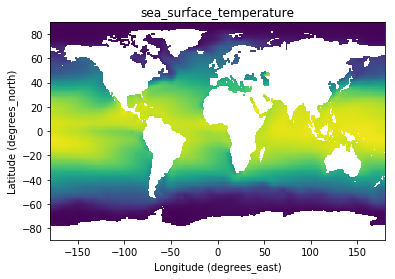

In [18]:
plt.pcolormesh(lon[:], lat[:], tos_masked_handle)
plt.title(tos_handle.standard_name);
plt.xlabel('Longitude (%s)' %lon.units);
plt.ylabel('Latitude (%s)' %lat.units);